In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


C:\Users\Lenovo PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lenovo PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lenovo PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lenovo PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [3]:
np.shape(x_train)

(60000, 28, 28)

**The 60000 images are already converted into np array of (28x28) pixel data.**



In [4]:
np.shape(y_train)

(60000,)

**y_train is the labelled data i.e., Each image identified as a digit. 
For instance, look at the below example.**

In [5]:
y_train[0]

5

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Some values needs to be normalized as you can see they go as high as 253**

In [7]:
X_train=tf.keras.utils.normalize(x_train,axis=1)
X_test=tf.keras.utils.normalize(x_test,axis=1)

Here is the image of the same using the data from the training numpy array.

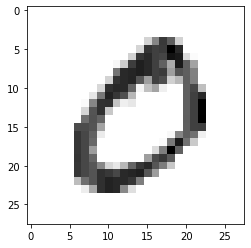

In [19]:
plt.imshow(X_train[1], cmap= plt.cm.binary)

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**As you can see the values are scaled between 0 and 1**

In [10]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train, epochs=3)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2682 - acc: 0.9220
Epoch 2/3
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1094 - acc: 0.9662
Epoch 3/3
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0737 - acc: 0.9759


**The main goal is to reduce the loss. And as you can see the loss is decreasing with each epoch**

In [11]:
val_loss,val_acc=model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0932 - acc: 0.9713


In [12]:
print(val_loss,val_acc)

0.09324541131742299 0.9713


**Loss seems to be slightly higher while evaluating and the accuracy is close enough to the training accuracy.Hence there is no overfitting**

In [13]:
predictions=model.predict(X_test)

In [14]:
print(predictions)

[[1.4219839e-09 7.8298185e-10 3.6575040e-07 ... 9.9999917e-01
  1.2276524e-08 2.4137972e-07]
 [1.5338229e-07 2.4542394e-05 9.9996758e-01 ... 4.5809221e-11
  1.7289845e-07 8.5461976e-12]
 [6.5693498e-06 9.9834800e-01 5.6211857e-06 ... 1.6963918e-04
  1.3063861e-03 4.6275425e-05]
 ...
 [1.2974600e-09 9.4362473e-09 2.1983876e-08 ... 1.9336783e-05
  5.1274624e-06 3.2350069e-04]
 [3.5090258e-07 2.4783653e-09 8.2505537e-08 ... 2.6044745e-06
  2.6561800e-02 1.9416408e-08]
 [2.0353706e-05 1.6663286e-07 1.8733659e-05 ... 8.7946903e-09
  8.5140732e-07 3.4122136e-09]]


In [15]:
print(np.argmax(predictions[0]))

7


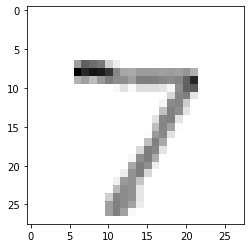

In [16]:
plt.imshow(X_test[0],cmap=plt.cm.binary)

In [17]:
np.shape(predictions)

(10000, 10)

In [18]:
np.shape(X_test)

(10000, 28, 28)